# Análise de Sentimentos - Tweets

In [742]:
#Conjunto de importações
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

In [743]:
#Armazenamento de documentos (frases) na lista dataset
dataset = [("@luciogirotto: TERCEIRA RECLAMAÇAO bradesco alobradesco bancocentralbr BandNews datenaoficial ReclameAQUI http://t.co/v9SgaBB27A"),
           ("@RadioRockPuro: @Nilson_de_Vix @claro um pior que outro, não tem serviço que preste// nenhum deles, @Claro, presta. E, são caríssimos. .."),
           ("As melhores e verdadeiras canções compomos quando temos certeza do caminho a seguir. Falo do que vivo, vivo do... http://t.co/6pVMQFg0LM"),
           ("Boa sorte pra querida Cris Duclos da vivo que ta concorrendo ao Caboré 2013. Bacana participar do… http://t.co/xvtwR8UDDB"),
           ("Conte uma História para uma criança Conte uma história pra Mim Itaú Itau Itaú Cultural Itaú Personnalité... http://t.co/TOir8zL4wE"),
           ("Péssimo é a palavra que melhor define o serviço 3G da @ClaroBrasil. O SAC não funciona e a rede vive indisponível"),
           ("Quero q todo mundo tenha dois chocolates: um pra comer e outro pra quem ta pedindo. ^-^ ^-^ Bradesco QueroQueTodoMundoTenha"),
           ("SE FOR FRACO NAO FICA DE PEH,VIVO NO LIMITE,SOH Q NAO SOU LIMITADO. Vivo"),
           ("ADSL OFF, Oi Velox Off novamente... que maravilha!"),
           ("AloBradesco chega de desculpas quero soluções!!! Mais uma vez os caixas do auto-atendimento fora do ar as 11:15 de 13/12/13 SOLUÇÕES!!!"),
           ("alobradesco mais de 30 minutos e não fui atendido ag 2178"),
           ("bancodobrasil boa tarde, não consigo acessar a conta pela net. O que está acontecendo? "),
           ("bancodobrasil fdp. Paguei minha multa já faz tempo e olho no site ta como não paga"),
           ("bancodobrasil me impressionando a cada dia: abrem extratos aleatorios no app pra mobile e dizem q agr ta td bem e q nao foi serio! "),
           ("BancodoBrasil,  incompetência define! "),
           ("BancoItau ItauBanco Itau Horrível ficar esperando por um longo período sem explicação. Acho digno, ao menos uma informação. "),
           ("bradesco, o banco mais retrógrado do brasil!!!!! "),
           ("Bradesco, sempre fudendo com a vida das pessoas! http://t.co/js3pF4n2Yc"),
           ("Cine EmChamas JogosVorazes @Bb' AmorMeu Lôra Branquelo Perfeito :) @Betinho_melo http://t.co/0fzpDxHNqM"),
            ("cineart itaucard paga meia agora. Muito bom http://t.co/uIMWqfinIQ")]

In [744]:
#Armazenamento das polaridades de cada documento (frase) na lista polaris
polaris = [-1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1,-1, -1, -1, -1, -1, -1, 1, 1]
# Uma polaridade com 50% de balanceamento
# polaris = [-1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1]

In [745]:
#Divisão dos dados das listas dataset e polaris em conjuntos de treinamento e validação
dados_treino, dados_val, pols_treino, pols_val = train_test_split(dataset, polaris, test_size=0.30)

In [746]:
#Print do conjunto de treinamento e suas respectivas polaridades
print("Conjunto de Treinamento")
print(dados_treino)
print("Polaridades do Conjunto de Treinamento")
print(pols_treino)
print("\n---------------------------------------------\n")
#Print do conjunto de validação e suas respectivas polaridades
print("Conjunto de Validação")
print(dados_val)
print("Polaridades do Conjunto de Validação")
print(pols_val)

Conjunto de Treinamento
['bancodobrasil me impressionando a cada dia: abrem extratos aleatorios no app pra mobile e dizem q agr ta td bem e q nao foi serio! ', 'Bradesco, sempre fudendo com a vida das pessoas! http://t.co/js3pF4n2Yc', 'BancoItau ItauBanco Itau Horrível ficar esperando por um longo período sem explicação. Acho digno, ao menos uma informação. ', 'ADSL OFF, Oi Velox Off novamente... que maravilha!', 'Conte uma História para uma criança Conte uma história pra Mim Itaú Itau Itaú Cultural Itaú Personnalité... http://t.co/TOir8zL4wE', '@luciogirotto: TERCEIRA RECLAMAÇAO bradesco alobradesco bancocentralbr BandNews datenaoficial ReclameAQUI http://t.co/v9SgaBB27A', 'As melhores e verdadeiras canções compomos quando temos certeza do caminho a seguir. Falo do que vivo, vivo do... http://t.co/6pVMQFg0LM', 'SE FOR FRACO NAO FICA DE PEH,VIVO NO LIMITE,SOH Q NAO SOU LIMITADO. Vivo', 'BancodoBrasil,  incompetência define! ', 'Quero q todo mundo tenha dois chocolates: um pra comer e o

In [747]:
#Cria uma instância para a bag-of-words   
bag = CountVectorizer()

In [748]:
#Método fit_transform: 
#fit = cria e aprende a bag
#transform = cria a matriz termo-documento
bag_treino = bag.fit_transform(dados_treino)

In [749]:
#A função sorted() ordena o vocabulário da bag-of-words   
print("Vocabulário da bag-of-words")
print(sorted(bag.vocabulary_))

print("\n---------------------------------------------\n")

Vocabulário da bag-of-words
['0fzpdxhnqm', '11', '12', '13', '15', '3g', '6pvmqfg0lm', 'abrem', 'acho', 'adsl', 'agr', 'aleatorios', 'alobradesco', 'amormeu', 'ao', 'app', 'ar', 'as', 'atendimento', 'auto', 'bancocentralbr', 'bancodobrasil', 'bancoitau', 'bandnews', 'bb', 'bem', 'betinho_melo', 'bradesco', 'branquelo', 'cada', 'caixas', 'caminho', 'canções', 'certeza', 'chega', 'chocolates', 'cine', 'clarobrasil', 'co', 'com', 'comer', 'como', 'compomos', 'conte', 'criança', 'cultural', 'da', 'das', 'datenaoficial', 'de', 'define', 'desculpas', 'dia', 'digno', 'dizem', 'do', 'dois', 'emchamas', 'esperando', 'explicação', 'extratos', 'falo', 'faz', 'fdp', 'fica', 'ficar', 'foi', 'for', 'fora', 'fraco', 'fudendo', 'funciona', 'história', 'horrível', 'http', 'impressionando', 'incompetência', 'indisponível', 'informação', 'itau', 'itaubanco', 'itaú', 'jogosvorazes', 'js3pf4n2yc', 'já', 'limitado', 'limite', 'longo', 'luciogirotto', 'lôra', 'mais', 'maravilha', 'me', 'melhor', 'melhores', 

In [750]:
#Printa a bag-of-words    
print("Bag-of-words de treino")
print(bag_treino)
print("\n---------------------------------------------\n")

Bag-of-words de treino
  (0, 21)	1
  (0, 92)	1
  (0, 75)	1
  (0, 29)	1
  (0, 52)	1
  (0, 7)	1
  (0, 60)	1
  (0, 11)	1
  (0, 102)	1
  (0, 15)	1
  (0, 121)	1
  (0, 98)	1
  (0, 54)	1
  (0, 10)	1
  (0, 142)	1
  (0, 143)	1
  (0, 25)	1
  (0, 101)	1
  (0, 66)	1
  (0, 136)	1
  (1, 27)	1
  (1, 135)	1
  (1, 70)	1
  (1, 39)	1
  (1, 156)	1
  :	:
  (12, 104)	1
  (12, 122)	1
  (12, 112)	1
  (12, 93)	1
  (12, 137)	1
  (12, 5)	1
  (12, 46)	1
  (12, 37)	1
  (12, 131)	1
  (12, 71)	1
  (12, 130)	1
  (12, 157)	1
  (12, 77)	1
  (13, 74)	1
  (13, 38)	1
  (13, 36)	1
  (13, 57)	1
  (13, 82)	1
  (13, 24)	1
  (13, 13)	1
  (13, 89)	1
  (13, 28)	1
  (13, 116)	1
  (13, 26)	1
  (13, 0)	1

---------------------------------------------



In [751]:
#Cria a matriz termo-documento para o conjunto de validação com a bag já treinada
bag_val = bag.transform(dados_val)

In [752]:
#Printa a matriz termo-documento criada para o conjunto de validação    
print("Bag-of-words de validação")
print(bag_val)
print("\n---------------------------------------------\n")

Bag-of-words de validação
  (0, 27)	1
  (0, 55)	1
  (0, 90)	1
  (1, 21)	1
  (1, 104)	1
  (1, 124)	1
  (2, 12)	1
  (2, 49)	1
  (2, 90)	1
  (2, 104)	1
  (3, 104)	1
  (3, 109)	1
  (3, 124)	2
  (3, 137)	1
  (3, 150)	1
  (4, 14)	1
  (4, 38)	1
  (4, 46)	1
  (4, 55)	1
  (4, 74)	1
  (4, 121)	1
  (4, 124)	1
  (4, 142)	1
  (4, 158)	1
  (5, 38)	1
  (5, 74)	1
  (5, 110)	1

---------------------------------------------



In [753]:
print("Polidaridades de Validação -- ", pols_val)

Polidaridades de Validação --  [-1, -1, -1, -1, 1, 1]


Projecting 159-dimensional data to 2D


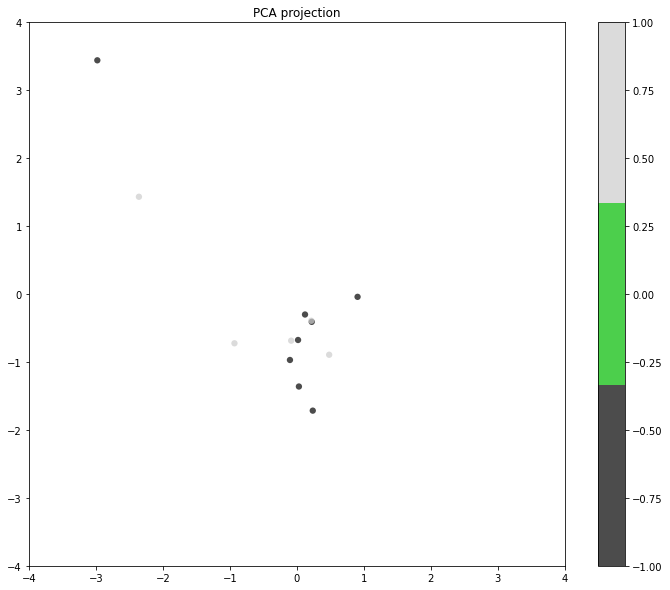

In [754]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Usa PCA para reduzir a quantidade de atributos de 4 para 2

pca = PCA(n_components=2)
# X_reduced = pca.fit_transform(( pd.DataFrame(bag_treino).values)
X_reduced = pca.fit_transform(bag_treino.toarray())


print('Projecting %d-dimensional data to 2D' % bag_treino.toarray().shape[1])

plt.figure(figsize=(12,10))
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=pols_treino, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 3))
plt.colorbar()
plt.title('PCA projection');

SVM

In [755]:
x = bag_treino.toarray()
y = pols_treino

In [756]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(x, y)

preds = svc.predict(bag_val.toarray())

for p, gt in zip(preds, pols_val):
    print(f'{p}\t\t{gt}:    \t{p==gt}')
acertos = sum(preds == pols_val)
print('Acurácia: ',acertos/len(pols_val)*100,'%')
print('==================')

print(svc.score(bag_val.toarray(), pols_val))

-1		-1:    	True
-1		-1:    	True
-1		-1:    	True
-1		-1:    	True
-1		1:    	False
-1		1:    	False
Acurácia:  66.66666666666666 %
0.6666666666666666


In [757]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(x, y)

preds = svc.predict(bag_val.toarray())

for p, gt in zip(preds, pols_val):
    print(f'{p}\t\t{gt}:    \t{p==gt}')
acertos = sum(preds == pols_val)
print('Acurácia: ',acertos/len(pols_val)*100,'%')
print('==================')

print(svc.score(bag_val.toarray(), pols_val))

-1		-1:    	True
-1		-1:    	True
-1		-1:    	True
-1		-1:    	True
1		1:    	True
-1		1:    	False
Acurácia:  83.33333333333334 %
0.8333333333333334


In [758]:
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid')
svc.fit(x, y)

preds = svc.predict(bag_val.toarray())

for p, gt in zip(preds, pols_val):
    print(f'{p}\t\t{gt}:    \t{p==gt}')
acertos = sum(preds == pols_val)
print('Acurácia: ',acertos/len(pols_val)*100,'%')
print('==================')

print(svc.score(bag_val.toarray(), pols_val))

-1		-1:    	True
-1		-1:    	True
-1		-1:    	True
-1		-1:    	True
-1		1:    	False
-1		1:    	False
Acurácia:  66.66666666666666 %
0.6666666666666666


Arvore de Decisão

In [759]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(criterion="entropy")
arvore.fit(x, y)
preds = arvore.predict(bag_val.toarray())
for p, gt in zip(preds, pols_val):
    print(f'{p}\t\t{gt}:    \t{p==gt}')
acertos = sum(preds == pols_val)
print('Resultado: ',acertos/len(pols_val)*100,'%')
print('==================')

print(arvore.score(bag_val.toarray(), pols_val))

1		-1:    	False
-1		-1:    	True
-1		-1:    	True
-1		-1:    	True
1		1:    	True
1		1:    	True
Resultado:  83.33333333333334 %
0.8333333333333334


In [760]:
np.unique(np.array(y))

array([-1,  1])

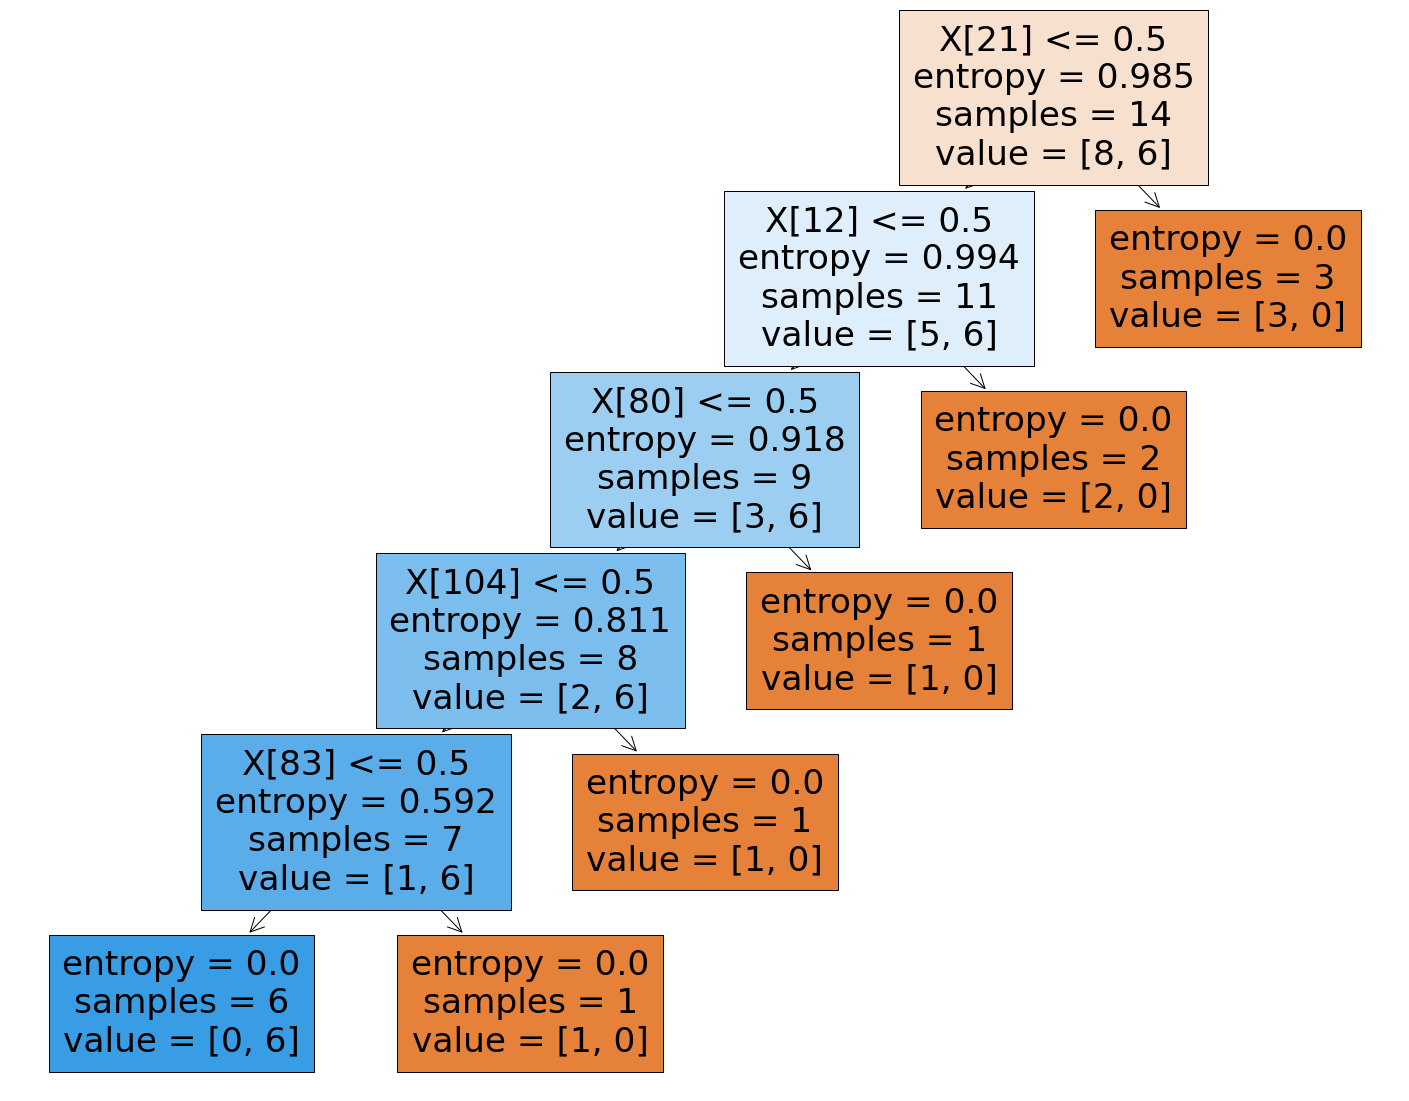

In [761]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(arvore, 
                   filled=True)
# iris = iris.dropna()

Random Forest

In [762]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x, y)

preds = clf.predict(bag_val.toarray())
for p, gt in zip(preds, pols_val):
    print(f'{p}\t\t{gt}:    \t{p==gt}')
acertos = sum(preds == pols_val)
print('Resultado: ',acertos/len(pols_val)*100,'%')
print('==================')

print(clf.score(bag_val.toarray(), pols_val))

-1		-1:    	True
-1		-1:    	True
-1		-1:    	True
-1		-1:    	True
-1		1:    	False
-1		1:    	False
Resultado:  66.66666666666666 %
0.6666666666666666
